<a href="https://colab.research.google.com/github/saracmbr/Code_Demo/blob/master/medical_cost_regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

tf.random.set_seed(42)
#ohe = OneHotEncoder(handle_unknown='ignore')
#sex_trans = ohe.fit_transform(data[["sex"]]).toarray()
#sex_trans[:,0]

#dummies = ['sex', 'smoker','region']
#ct = ColumnTransformer([('', OneHotEncoder(), dummies),],remainder='passthrough')      
#pd.DataFrame(ct.fit_transform(data), columns = ct.get_feature_names_out())

#data = pd.get_dummies(data)
data = shuffle(data)
y = data[["charges"]]
x = data.drop("charges",axis=1) 


In [7]:



numeric_features = ["age", "bmi","children"]
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_features = ["smoker", "sex", "region"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


In [14]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train=pd.DataFrame(preprocessor.fit_transform(x_train), columns = preprocessor.get_feature_names_out())
x_test=pd.DataFrame(preprocessor.transform(x_test), columns = preprocessor.get_feature_names_out())

x_train.head()

,num__age,num__bmi,num__children,cat__smoker_no,cat__smoker_yes,cat__sex_female,cat__sex_male,cat__region_northeast,cat__region_northwest,cat__region_southeast,cat__region_southwest
0,-0.790624,0.794216,-0.916547,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-0.367393,-0.510067,-0.097928,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.367393,0.856676,-0.916547,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-1.002239,-0.148451,1.539310,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.496008,0.185221,-0.916547,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [15]:
x_test.head()

,num__age,num__bmi,num__children,cat__smoker_no,cat__smoker_yes,cat__sex_female,cat__sex_male,cat__region_northeast,cat__region_northwest,cat__region_southeast,cat__region_southwest
0,-0.508470,2.238214,-0.916547,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.267453,-0.082703,-0.097928,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.508470,2.617910,0.720691,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.425469,-0.095853,-0.916547,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.367393,0.592861,-0.916547,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [45]:
 
# Create a new model 
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(128),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                        metrics=['mae'])

# Fit the model
history = insurance_model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=150)

Epoch 1/150
34/34 [==============================] - 1s 11ms/step - loss: 13144.2686 - mae: 13144.2686 - val_loss: 13495.9229 - val_mae: 13495.9229
Epoch 2/150
34/34 [==============================] - 0s 5ms/step - loss: 12755.8477 - mae: 12755.8477 - val_loss: 12680.6230 - val_mae: 12680.6230
Epoch 3/150
34/34 [==============================] - 0s 5ms/step - loss: 11340.5869 - mae: 11340.5869 - val_loss: 10599.0605 - val_mae: 10599.0605
Epoch 4/150
34/34 [==============================] - 0s 7ms/step - loss: 9071.2529 - mae: 9071.2529 - val_loss: 8441.0752 - val_mae: 8441.0752
Epoch 5/150
34/34 [==============================] - 0s 6ms/step - loss: 7567.7656 - mae: 7567.7656 - val_loss: 7741.0010 - val_mae: 7741.0010
Epoch 6/150
34/34 [==============================] - 0s 4ms/step - loss: 6969.3774 - mae: 6969.3774 - val_loss: 7210.1763 - val_mae: 7210.1763
Epoch 7/150
34/34 [==============================] - 0s 4ms/step - loss: 6349.6138 - mae: 6349.6138 - val_loss: 6622.3423 - val_m

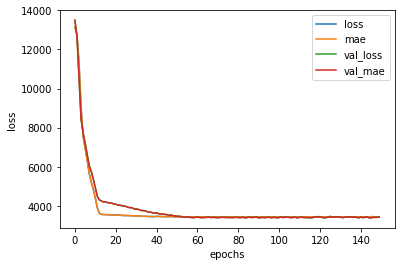

In [46]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");